# Titanic - Logistic Regression 

This notebook will make use of the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). The dataset will be used to predict a classification- survival or deceased. Important to note that the dataset is "semi-cleaned".

### Import the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

### Data Exploration

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The dataset contains the following columns:
- PassengerId (numeric value)
- Survived (0 or 1)
- Pclass (numeric value)
- Name (string)
- Sex (male of female)
- Age (numeric value)
- SibSp (# of siblings or spouses on board)
- Parch (# number of parents of children on board)
- Ticket (string)
- Fare (float)
- Cabin (string)
- Embarked (string)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The train dataset does have some in some columns null values. Especially the Age and Cabin column. This can be visually presented in by <code>sns.heatmap()</code> in Fig. 1. 

[Text(0.5, 1.0, 'Fig. 1: Heatmap of Titanic Dataset')]

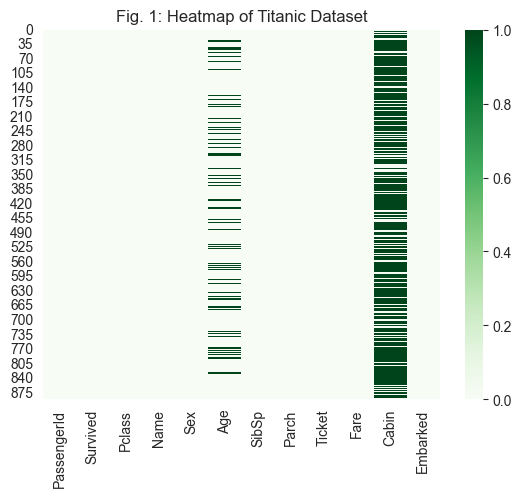

In [17]:

sns.heatmap(train.isnull(), cmap="Greens").set(title='Fig. 1: Heatmap of Titanic Dataset')


To have a quick overview of the Ages within the dataset we can use <code>sns.displot()</code>, see Fig. 2. Most of the passangers on board where between 20 and 40. 

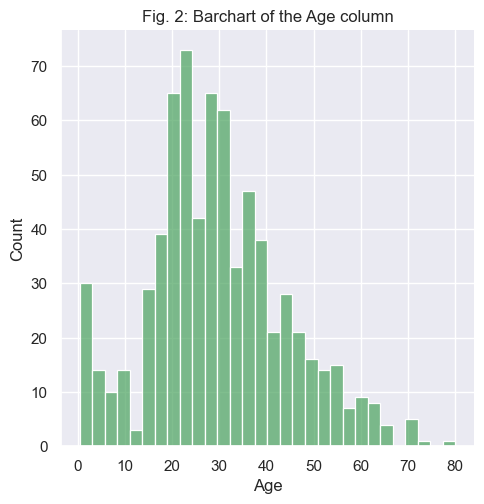

In [30]:
sns.set(color_codes=True)
sns.displot(train['Age'].dropna(), kde=False, bins=30, color='g').set(title='Fig. 2: Barchart of the Age column')

[Text(0.5, 1.0, 'Fig. 3: Countplot of the Sex column')]

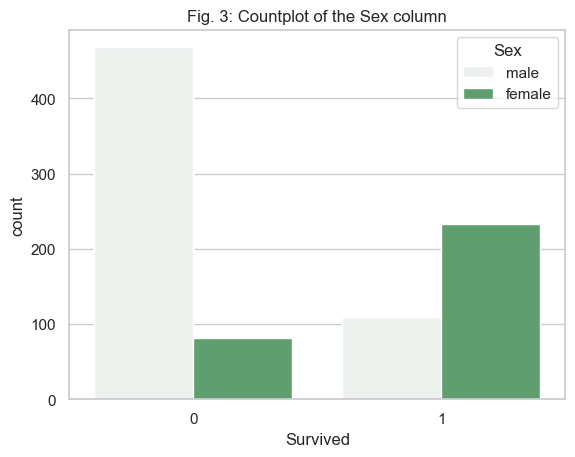

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, color='g').set(title='Fig. 3: Countplot of the Sex column')

The table in Fig. 3 shows that there were way less women on board the titanic than men (1:5). Furthermore, that almost twice as much women survived than men. 

[Text(0.5, 1.0, 'Fig. 4: Countplot of Survivors based on Class')]

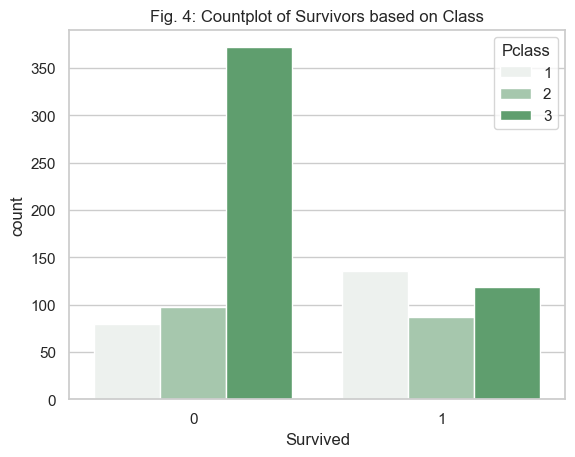

In [36]:
sns.countplot(x='Survived', hue='Pclass', data=train, color='g').set(title='Fig. 4: Countplot of Survivors based on Class')

According to Fig. 4, when it comes down to class and the ones who died, the third class has the most death (almost x 4). When looking at survivors, there is not much of a difference between te classes, besides that 2nd class has the least survivors.

[Text(0.5, 1.0, 'Fig. 5: Countplot of the Siblings or Spouses aboard')]

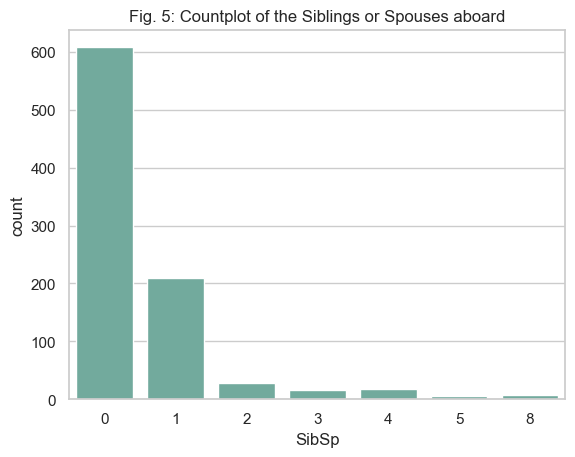

In [39]:
sns.countplot(x='SibSp', data = train, color='#69b3a2').set(title='Fig. 5: Countplot of the Siblings or Spouses aboard')

According to Fig. 5 most of the passengers did not have a spouse or siblings on board. The second highest are the ones with 1 spouse or sibling. 

<AxesSubplot:title={'center':'Fig. 6: Barchart of Fare prices'}>

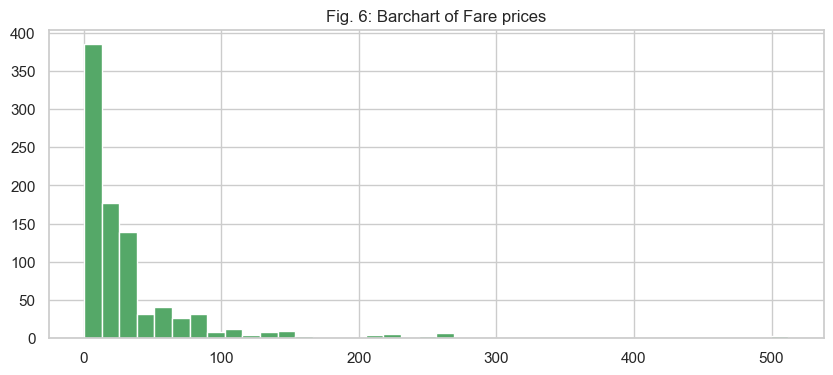

In [45]:
plt.title('Fig. 6: Barchart of Fare prices')
train['Fare'].hist(bins=40, figsize=(10,4), color='g')

According to Fig. 6 most of the tickets were below $50. Note that this is not recalculated to current prizes.

### Cleaning the Data

<AxesSubplot:title={'center':'Fig. 7: Boxplot of Pclass and Age columns'}, xlabel='Pclass', ylabel='Age'>

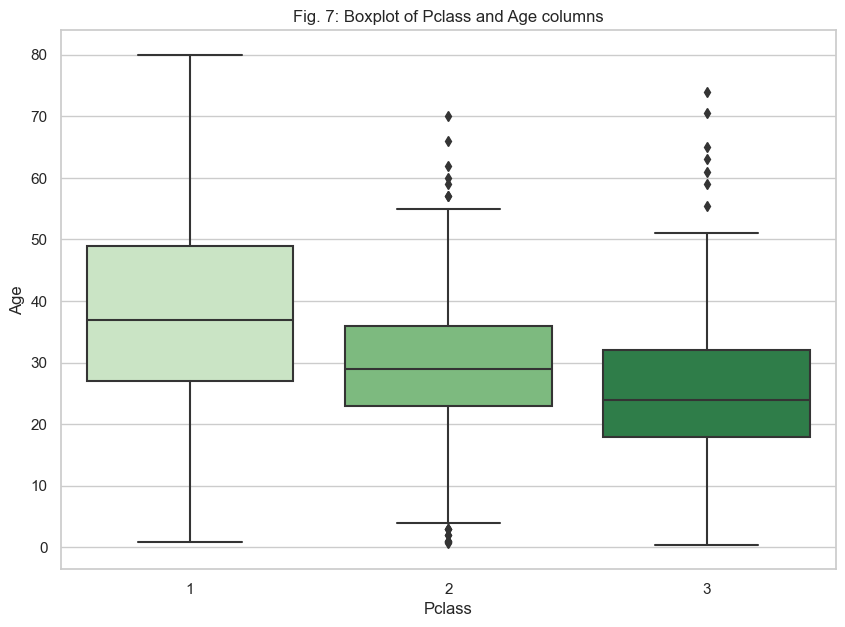

In [48]:
plt.figure(figsize=(10,7))
plt.title('Fig. 7: Boxplot of Pclass and Age columns')
sns.boxplot(x='Pclass', y='Age', data = train, palette="Greens")

When looking at the boxplot in Fig. 7, you can notice that people from the 1st and 2nd class are older than the ones from the third class.

In order to keep the Age column, we need to fill in the rows that have null values. With the following function we can do this:

In [49]:
def fill_in_age(col):
    Age = col[0]
    Pclass = col[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now this function will be applied to the dataset.

In [50]:
train['Age'] = train[['Age', 'Pclass']].apply(fill_in_age, axis=1)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As you can see, the Age column does not have any null values now. We will drop the Cabin column, since there are too many missing values (687 out of 891)

In [52]:
train.drop('Cabin', axis=1, inplace=True)

In [53]:
train.dropna(inplace=True)

In [54]:
# train.info() # there are no missing values now

In [55]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [56]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [57]:
train = pd.concat([train,sex,embark], axis=1)

In [58]:
train.drop(['Sex','Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [59]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

### Train the model
And use this model to predict the classes of whether or not a passenger survived on the titanic

In [61]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression
LogRegmodel = LogisticRegression()


In [65]:
LogRegmodel.fit(X_train, y_train)   

/Users/rozsabir/Documents/ML algorithms/machinelearning/.env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [66]:
predictions = LogRegmodel.predict(X_test)

Confusion Matrix:

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

